In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
57,58,298,99,2,4.0,2.0,7.60,0,0.46
110,111,305,108,5,3.0,3.0,8.48,0,0.61
184,185,316,106,2,2.5,4.0,8.32,0,0.72
131,132,303,105,5,5.0,4.5,8.65,0,0.77
145,146,320,113,2,2.0,2.5,8.64,1,0.81


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.drop(columns = ['Serial No.'], inplace = True)

In [6]:
df.shape

(500, 8)

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [9]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [12]:
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [13]:
model = Sequential([
    Input(shape = (7,)),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 1, activation = 'linear')
])

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['r2_score']
)

In [15]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs = 100,
    batch_size = 16,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1633 - r2_score: -8.3326 - val_loss: 0.0491 - val_r2_score: -1.2479
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0580 - r2_score: -2.6484 - val_loss: 0.0448 - val_r2_score: -1.0503
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0463 - r2_score: -1.4965 - val_loss: 0.0334 - val_r2_score: -0.5296
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331 - r2_score: -0.9347 - val_loss: 0.0274 - val_r2_score: -0.2559
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0308 - r2_score: -0.6062 - val_loss: 0.0226 - val_r2_score: -0.0327
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 - r2_score: -0.0691 - val_loss: 0.0188 - val_r2_score: 0.1410
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - r2_score: 0.0759 - val_loss: 0.0159 - val_r2_score: 0.2716
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 - r2_score: 0.2688 - val_loss: 0.0

In [16]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [17]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8292792578320612

In [19]:
print(f"Loss {history.history['loss'][-1]}")
print(f"Validation Loss {history.history['val_loss'][-1]}")

Loss 0.0036815949715673923
Validation Loss 0.0026825808454304934


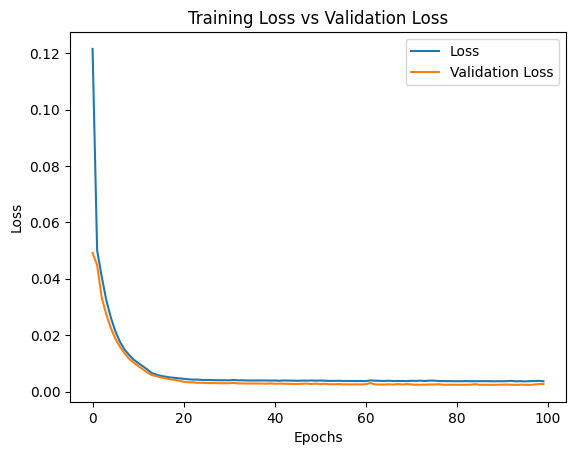

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend()
plt.show()

In [21]:
print(f"R2 Score:{history.history['r2_score'][-1]}")
print(f"Validation R2 Score:{history.history['val_r2_score'][-1]}")

R2 Score:0.8075984120368958
Validation R2 Score:0.8772692680358887


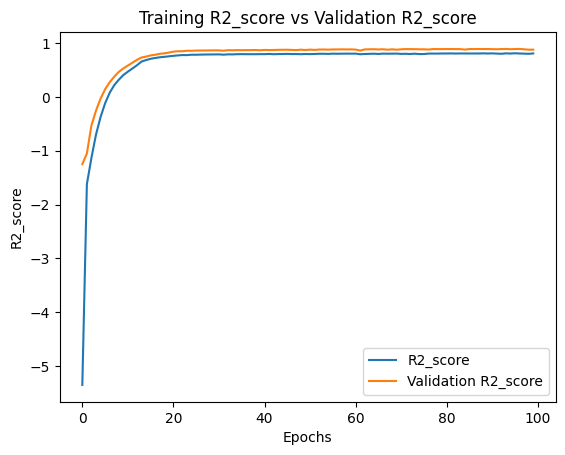

In [22]:
plt.plot(history.history['r2_score'], label = 'R2_score')
plt.plot(history.history['val_r2_score'], label = 'Validation R2_score')
plt.xlabel("Epochs")
plt.ylabel("R2_score")
plt.title("Training R2_score vs Validation R2_score")
plt.legend()
plt.show()

In [23]:
model.predict(X_test_scaled[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.8993659]], dtype=float32)

In [24]:
y_test[0]

0.92